In [1]:
import cogsworth
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import astropy.units as u

In [2]:
# this all just makes plots look nice
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.9 * fs,
          'ytick.labelsize': 0.9 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)
pd.set_option('display.max_columns', None)

In [3]:
p = cogsworth.COMPASPopulation(
    n_binaries=100,
    config_file=None,
    logfile_definitions=None,
    output_directory='./COMPAS_Output',
    final_kstar1=[13, 14],
)
p

<COMPASPopulation - 100 systems - galactic_potential=MilkyWayPotential, SFH=Wagg2022>

In [4]:
p.create_population()

Run for 100 binaries
Ended up with 101 binaries with m1 > 0 solar masses
[1e-02s] Sample initial binaries


[5.6s] Evolve binaries (run COSMIC)


112it [00:00, 1213.51it/s]             


[0.3s] Get orbits (run gala)
Overall: 5.9s


In [5]:
# print out the bpp table for the evolved binaries
p.bpp

,tphys,mass_1,mass_2,kstar_1,kstar_2,sep,ecc,rad_1,rad_2,bin_num,evol_type,RRLO_1,RRLO_2,porb
1,0.000000,24.020449,21.735756,1,1,44840.919742,0.286859,6.492348,6.101377,1,1,0.000391,0.000351,162603.573692
1,7.444151,23.142886,21.197682,2,1,46272.529937,0.286859,17.246311,14.514294,1,2,0.001004,0.000811,173152.016069
1,7.455998,23.085489,21.196546,4,1,46333.694807,0.286859,489.402421,14.572830,1,2,0.028428,0.000814,173610.077052
1,8.245191,22.357717,21.132777,4,2,47176.983466,0.286859,1119.728293,15.883251,1,2,0.063453,0.000877,179987.108064
1,8.258944,22.339625,21.083359,4,4,47250.329325,0.286859,1122.834247,324.170660,1,2,0.063552,0.017869,180547.193520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,33.888706,8.899451,4.390178,5,1,795.795399,0.000000,353.278256,2.376360,101,7,1.388577,0.006768,713.327595
101,33.888706,0.000000,0.000000,5,1,0.000000,0.000000,0.000000,0.000000,101,8,0.000000,0.000000,0.000000
101,33.888706,0.000000,0.000000,5,1,0.000000,0.000000,0.000000,0.000000,101,4,0.000000,0.000000,0.000000
101,33.888706,0.000000,0.000000,5,1,0.000000,0.000000,0.000000,0.000000,101,6,0.000000,0.000000,0.000000


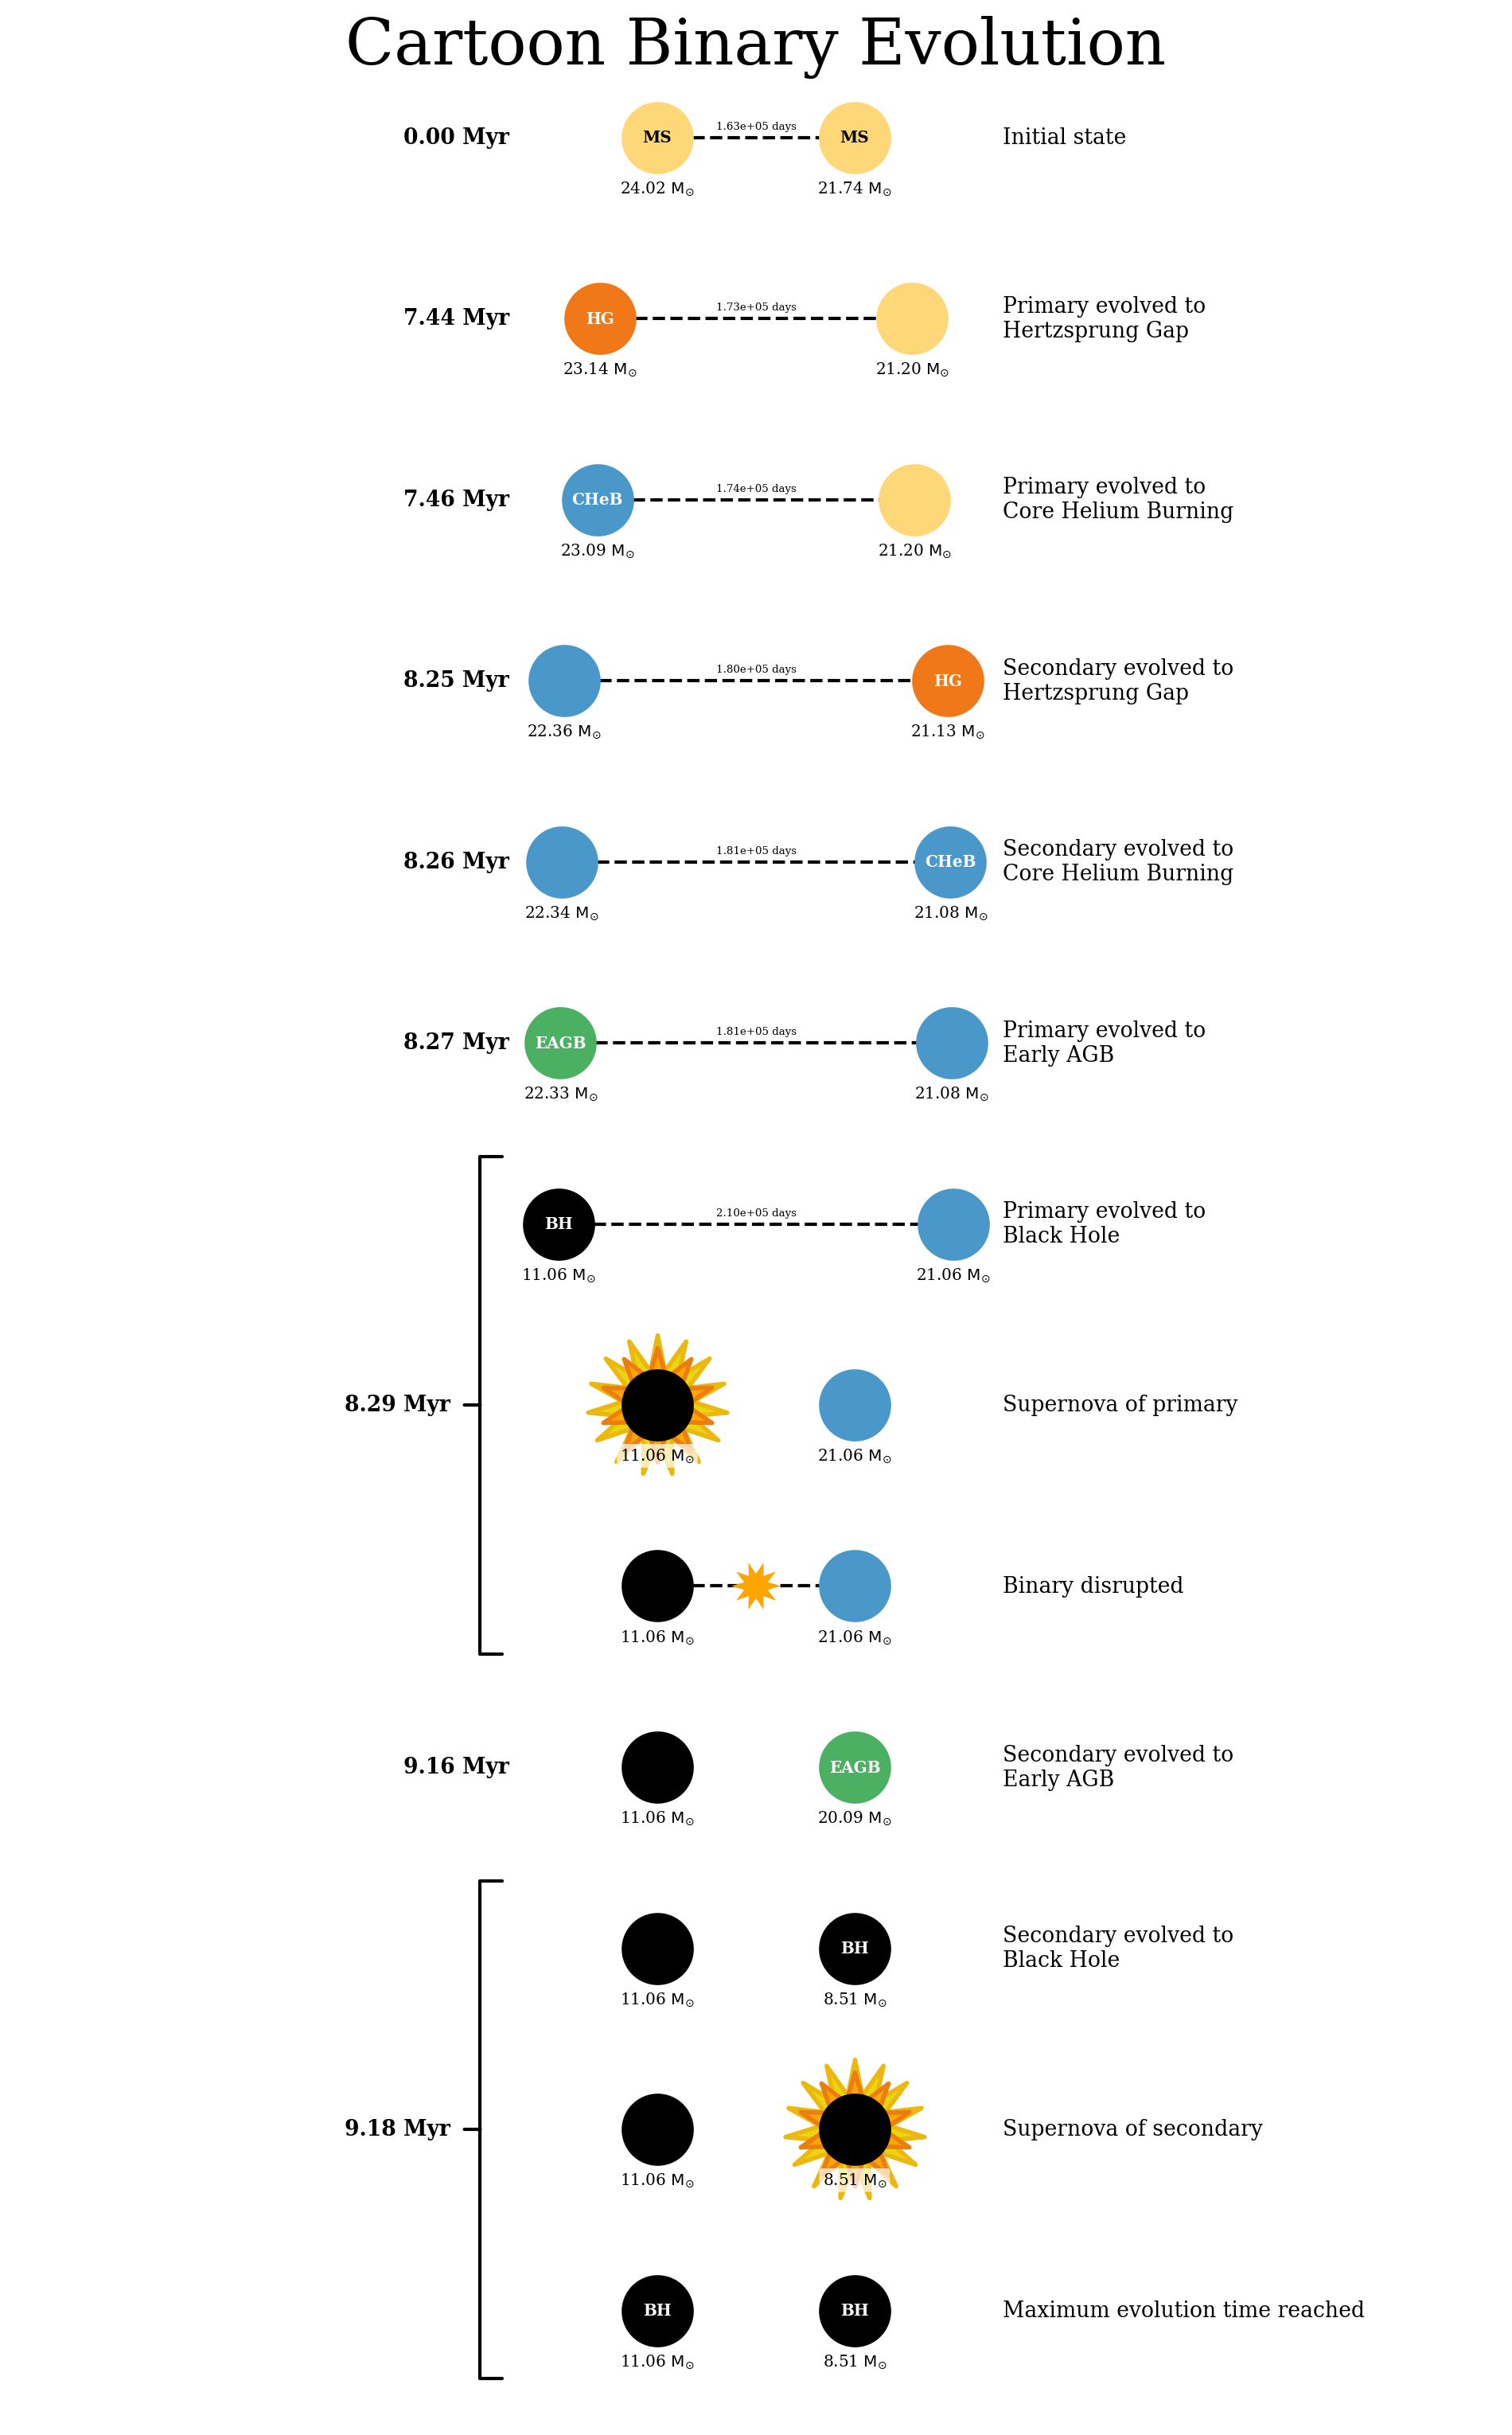

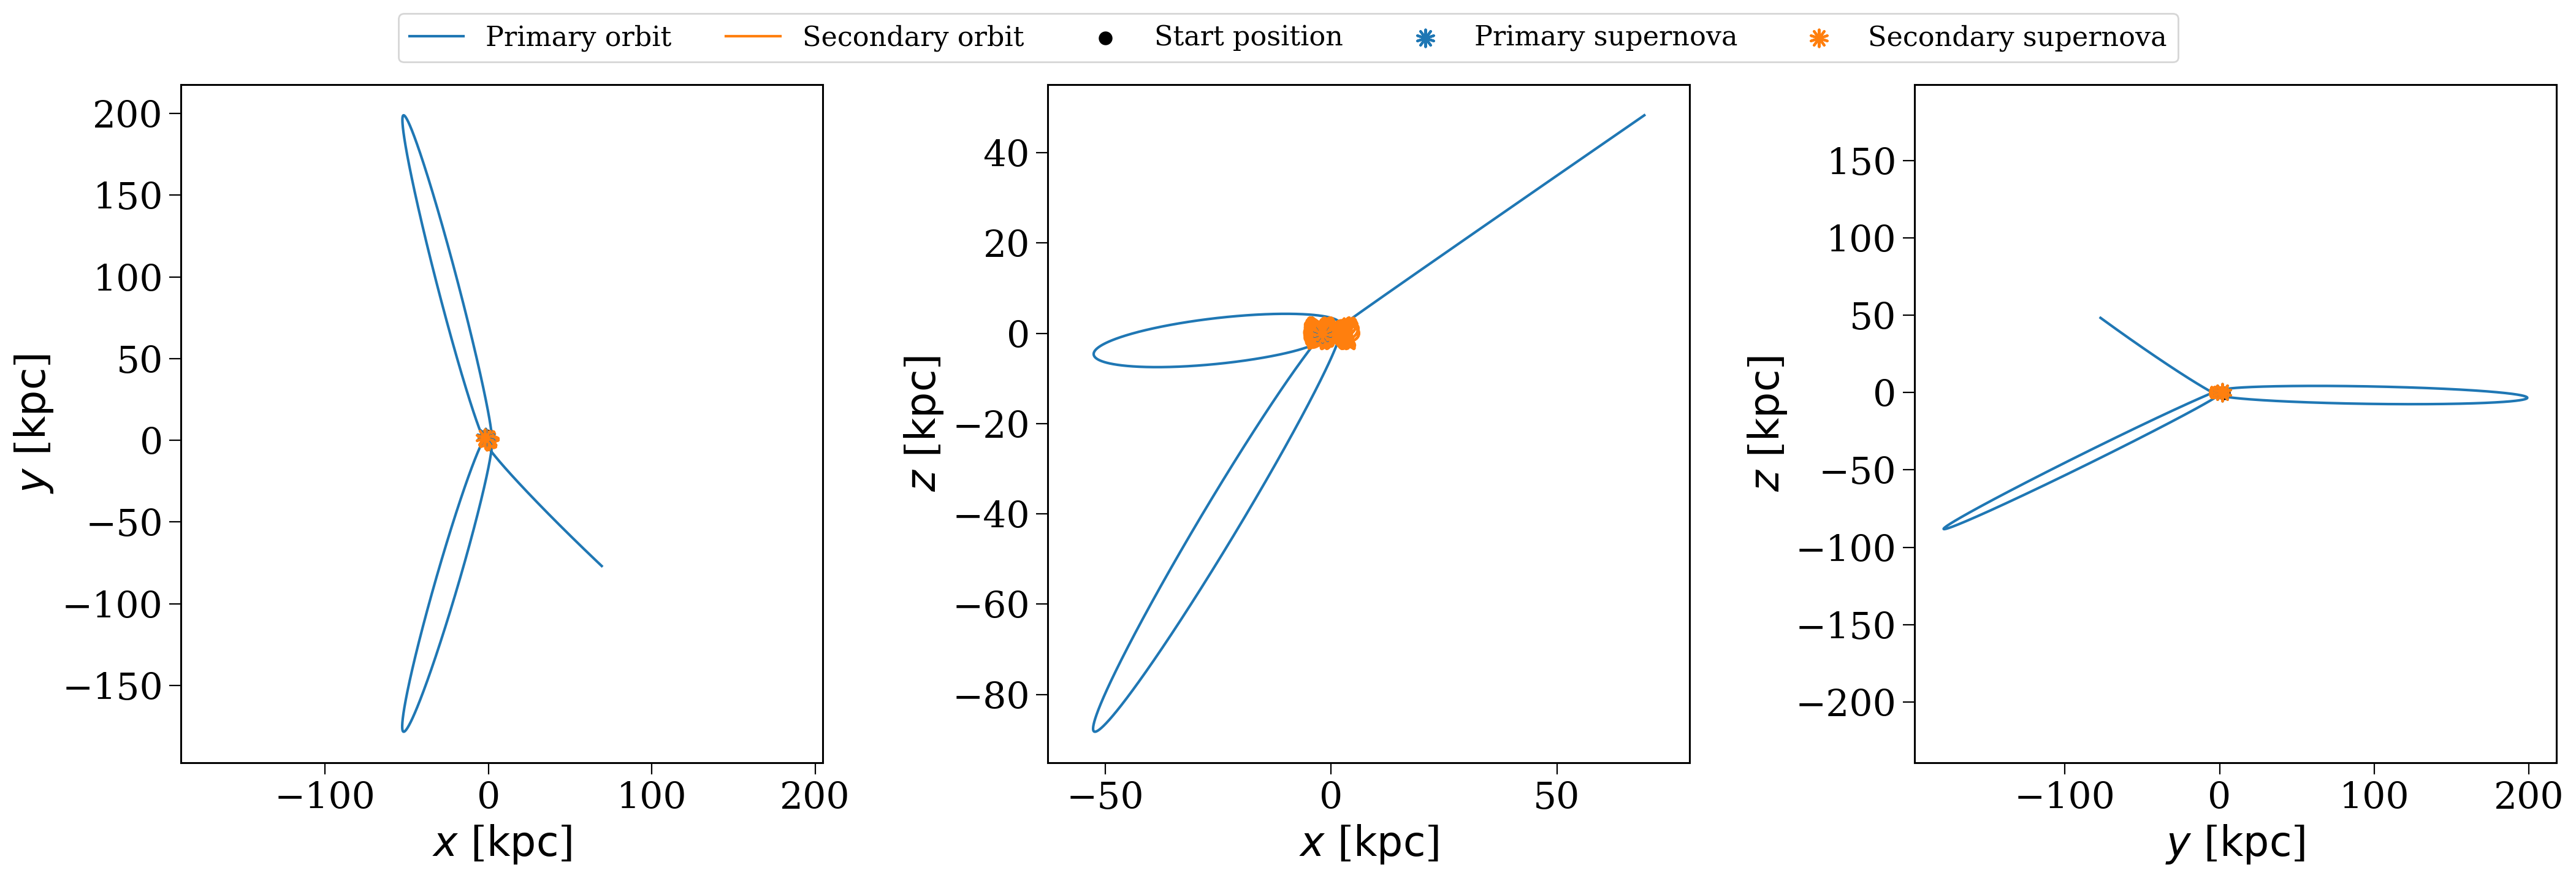

In [6]:
# plot the evolution and orbit of the first binary
p.plot_cartoon_binary(p.bin_nums[0]);
p.plot_orbit(p.bin_nums[0]);

First, let's download the default ``COMPAS`` config file from their GitHub repository.

In [7]:
COMPAS_DEFAULT_CONFIG_URL = "https://raw.githubusercontent.com/TeamCOMPAS/COMPAS/refs/heads/dev/compas_python_utils/preprocessing/compasConfigDefault.yaml"
!wget {COMPAS_DEFAULT_CONFIG_URL} -O compas_config.yaml

--2026-02-02 18:06:25--  https://raw.githubusercontent.com/TeamCOMPAS/COMPAS/refs/heads/dev/compas_python_utils/preprocessing/compasConfigDefault.yaml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47542 (46K) [text/plain]
Saving to: ‘compas_config.yaml’

compas_config.yaml  100%[===================>]  46.43K  --.-KB/s    in 0.001s  

2026-02-02 18:06:25 (39.8 MB/s) - ‘compas_config.yaml’ saved [47542/47542]



In [8]:
hurley_winds = cogsworth.COMPASPopulation(
    n_binaries=len(p),
    config_file='compas_config.yaml',
    logfile_definitions=None,
    output_directory='./COMPAS_Output_hurley_winds',
    final_kstar1=[13, 14],
)
hurley_winds._initial_binaries = p._initial_binaries.copy()
hurley_winds._initial_galaxy = p.initial_galaxy[:]
hurley_winds.perform_stellar_evolution()
hurley_winds.perform_galactic_evolution()

108it [00:00, 929.94it/s]              


Now we can take the most massive initial binary star (where winds are important) and compare the binary evolution across the two runs for the same binary

In [9]:
most_massive = p.bin_nums[p.initial_binaries["mass_1"].argmax()]

In [10]:
p.bpp.loc[most_massive]

,tphys,mass_1,mass_2,kstar_1,kstar_2,sep,ecc,rad_1,rad_2,bin_num,evol_type,RRLO_1,RRLO_2,porb
96,0.000000,58.532041,38.192146,1,1,18461.396587,0.030314,9.605389,7.443219,96,1,1.518579e-03,9.683532e-04,29544.224755
96,4.293896,50.578618,36.182795,2,1,20581.310343,0.030314,28.761856,13.774102,96,2,3.989142e-03,1.639439e-03,36718.889436
96,4.297866,19.567337,36.179806,7,1,32031.481222,0.030314,1.412270,13.790766,96,2,1.018207e-04,1.316009e-03,88940.084735
96,4.749850,16.282730,35.833516,8,1,34263.088751,0.030314,1.262747,16.483610,96,2,8.216884e-05,1.536435e-03,101764.550145
96,4.755994,16.143548,35.828816,14,1,34291.963093,0.030314,0.000068,16.532650,96,2,4.442848e-09,1.543025e-03,102034.161872
96,4.755994,16.143548,35.827699,14,1,34370.235012,0.032186,0.000068,16.532221,96,15,4.432757e-09,1.539459e-03,102384.802523
96,5.467048,16.143548,35.347952,14,2,34690.463062,0.032186,0.000068,20.036134,96,2,4.403607e-09,1.842185e-03,104301.532026
96,5.473791,16.143548,35.297624,14,4,34724.403175,0.032186,0.000068,812.811518,96,2,4.400549e-09,7.463236e-02,104505.722875
96,6.044947,16.143548,35.231830,14,5,34768.872783,0.032186,0.000068,964.511468,96,2,4.396552e-09,8.840625e-02,104773.563579
96,6.057153,16.143548,14.810516,14,14,57521.102596,0.032186,0.000068,0.000063,96,2,3.203301e-09,2.825320e-09,287227.012993


In [11]:
hurley_winds.bpp.loc[most_massive]

,tphys,mass_1,mass_2,kstar_1,kstar_2,sep,ecc,rad_1,rad_2,bin_num,evol_type,RRLO_1,RRLO_2,porb
96,0.000000,58.532041,38.192146,1,1,18461.396587,0.030314,9.605389,7.443219,96,1,1.518579e-03,9.683532e-04,29544.224755
96,4.755994,16.243548,35.827699,14,1,34300.213297,0.030314,0.000069,16.532221,96,15,4.474799e-09,1.540178e-03,101974.023468
96,6.057153,16.243548,14.873912,14,14,57398.903154,0.030437,0.000069,0.000063,96,16,3.231429e-09,2.842234e-09,285559.515438
96,6.057153,16.243548,14.873912,14,14,57398.903154,0.030437,0.000069,0.000063,96,10,3.231429e-09,2.842234e-09,285559.515438


Let's try:

- Running a simulation without galactic evolution
- Loading it back into a different object
- Running the galactic evolution

In [12]:
to_file = cogsworth.COMPASPopulation(
    n_binaries=100,
    final_kstar1=[13, 14],
    output_directory="./COMPAS_Output_IO",
)
to_file.sample_initial_binaries()
to_file.perform_stellar_evolution()

In [13]:
from_file = cogsworth.COMPASPopulation.from_COMPAS_output("./COMPAS_Output_IO/COMPAS_Output.h5")
from_file

<COMPASPopulation - 111 systems - galactic_potential=MilkyWayPotential, SFH=Wagg2022>

This loaded population can be demonstrated to be identical to the one that we ran it from:

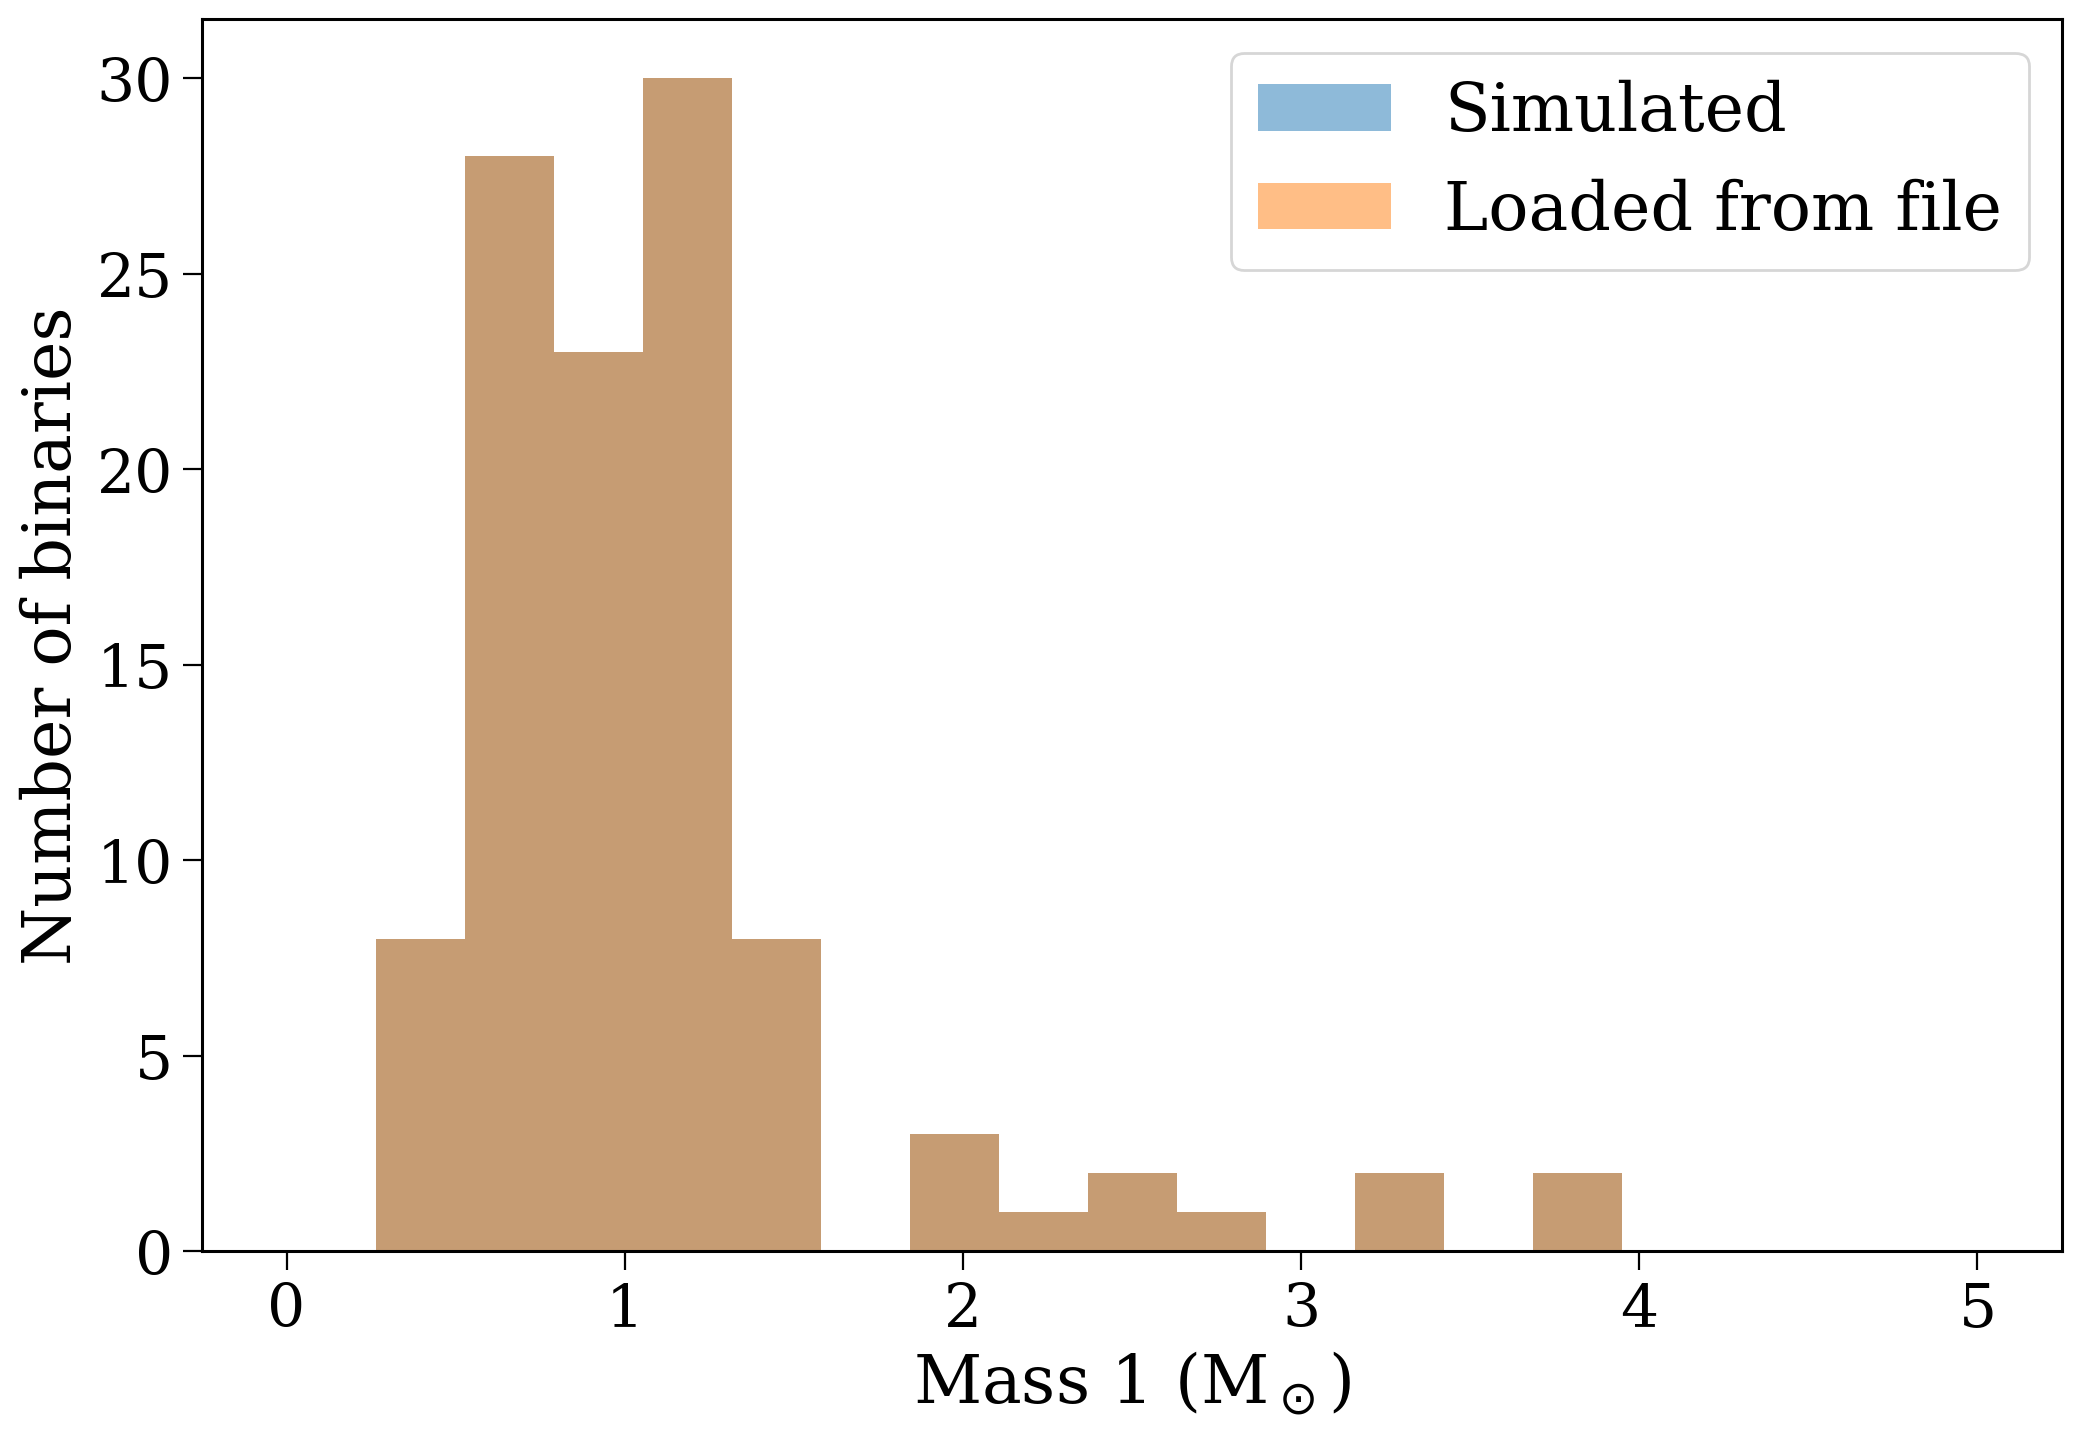

In [14]:
fig, ax = plt.subplots()

ax.hist(to_file.final_bpp["mass_1"], bins=np.linspace(0, 5, 20), alpha=0.5, label='Simulated')
ax.hist(from_file.final_bpp["mass_1"], bins=np.linspace(0, 5, 20), alpha=0.5, label='Loaded from file')

ax.set(
    xlabel='Mass 1 (M$_\odot$)',
    ylabel='Number of binaries',
)

ax.legend()
plt.show()

Plus now we can do the galactic evolution for this evolved population.

In [16]:
from_file.perform_galactic_evolution()

122it [00:00, 1290.90it/s]             


In [19]:
cosmic_p = p.to_Population()
cosmic_p

<Population - 101 evolved systems - galactic_potential=MilkyWayPotential, sfh_model=Wagg2022>

Now let's redo the stellar evolution and galactic orbit integration and see how things change!

In [ ]:
cosmic_p.perform_stellar_evolution()
cosmic_p.perform_galactic_evolution()

109it [00:00, 1138.93it/s]             


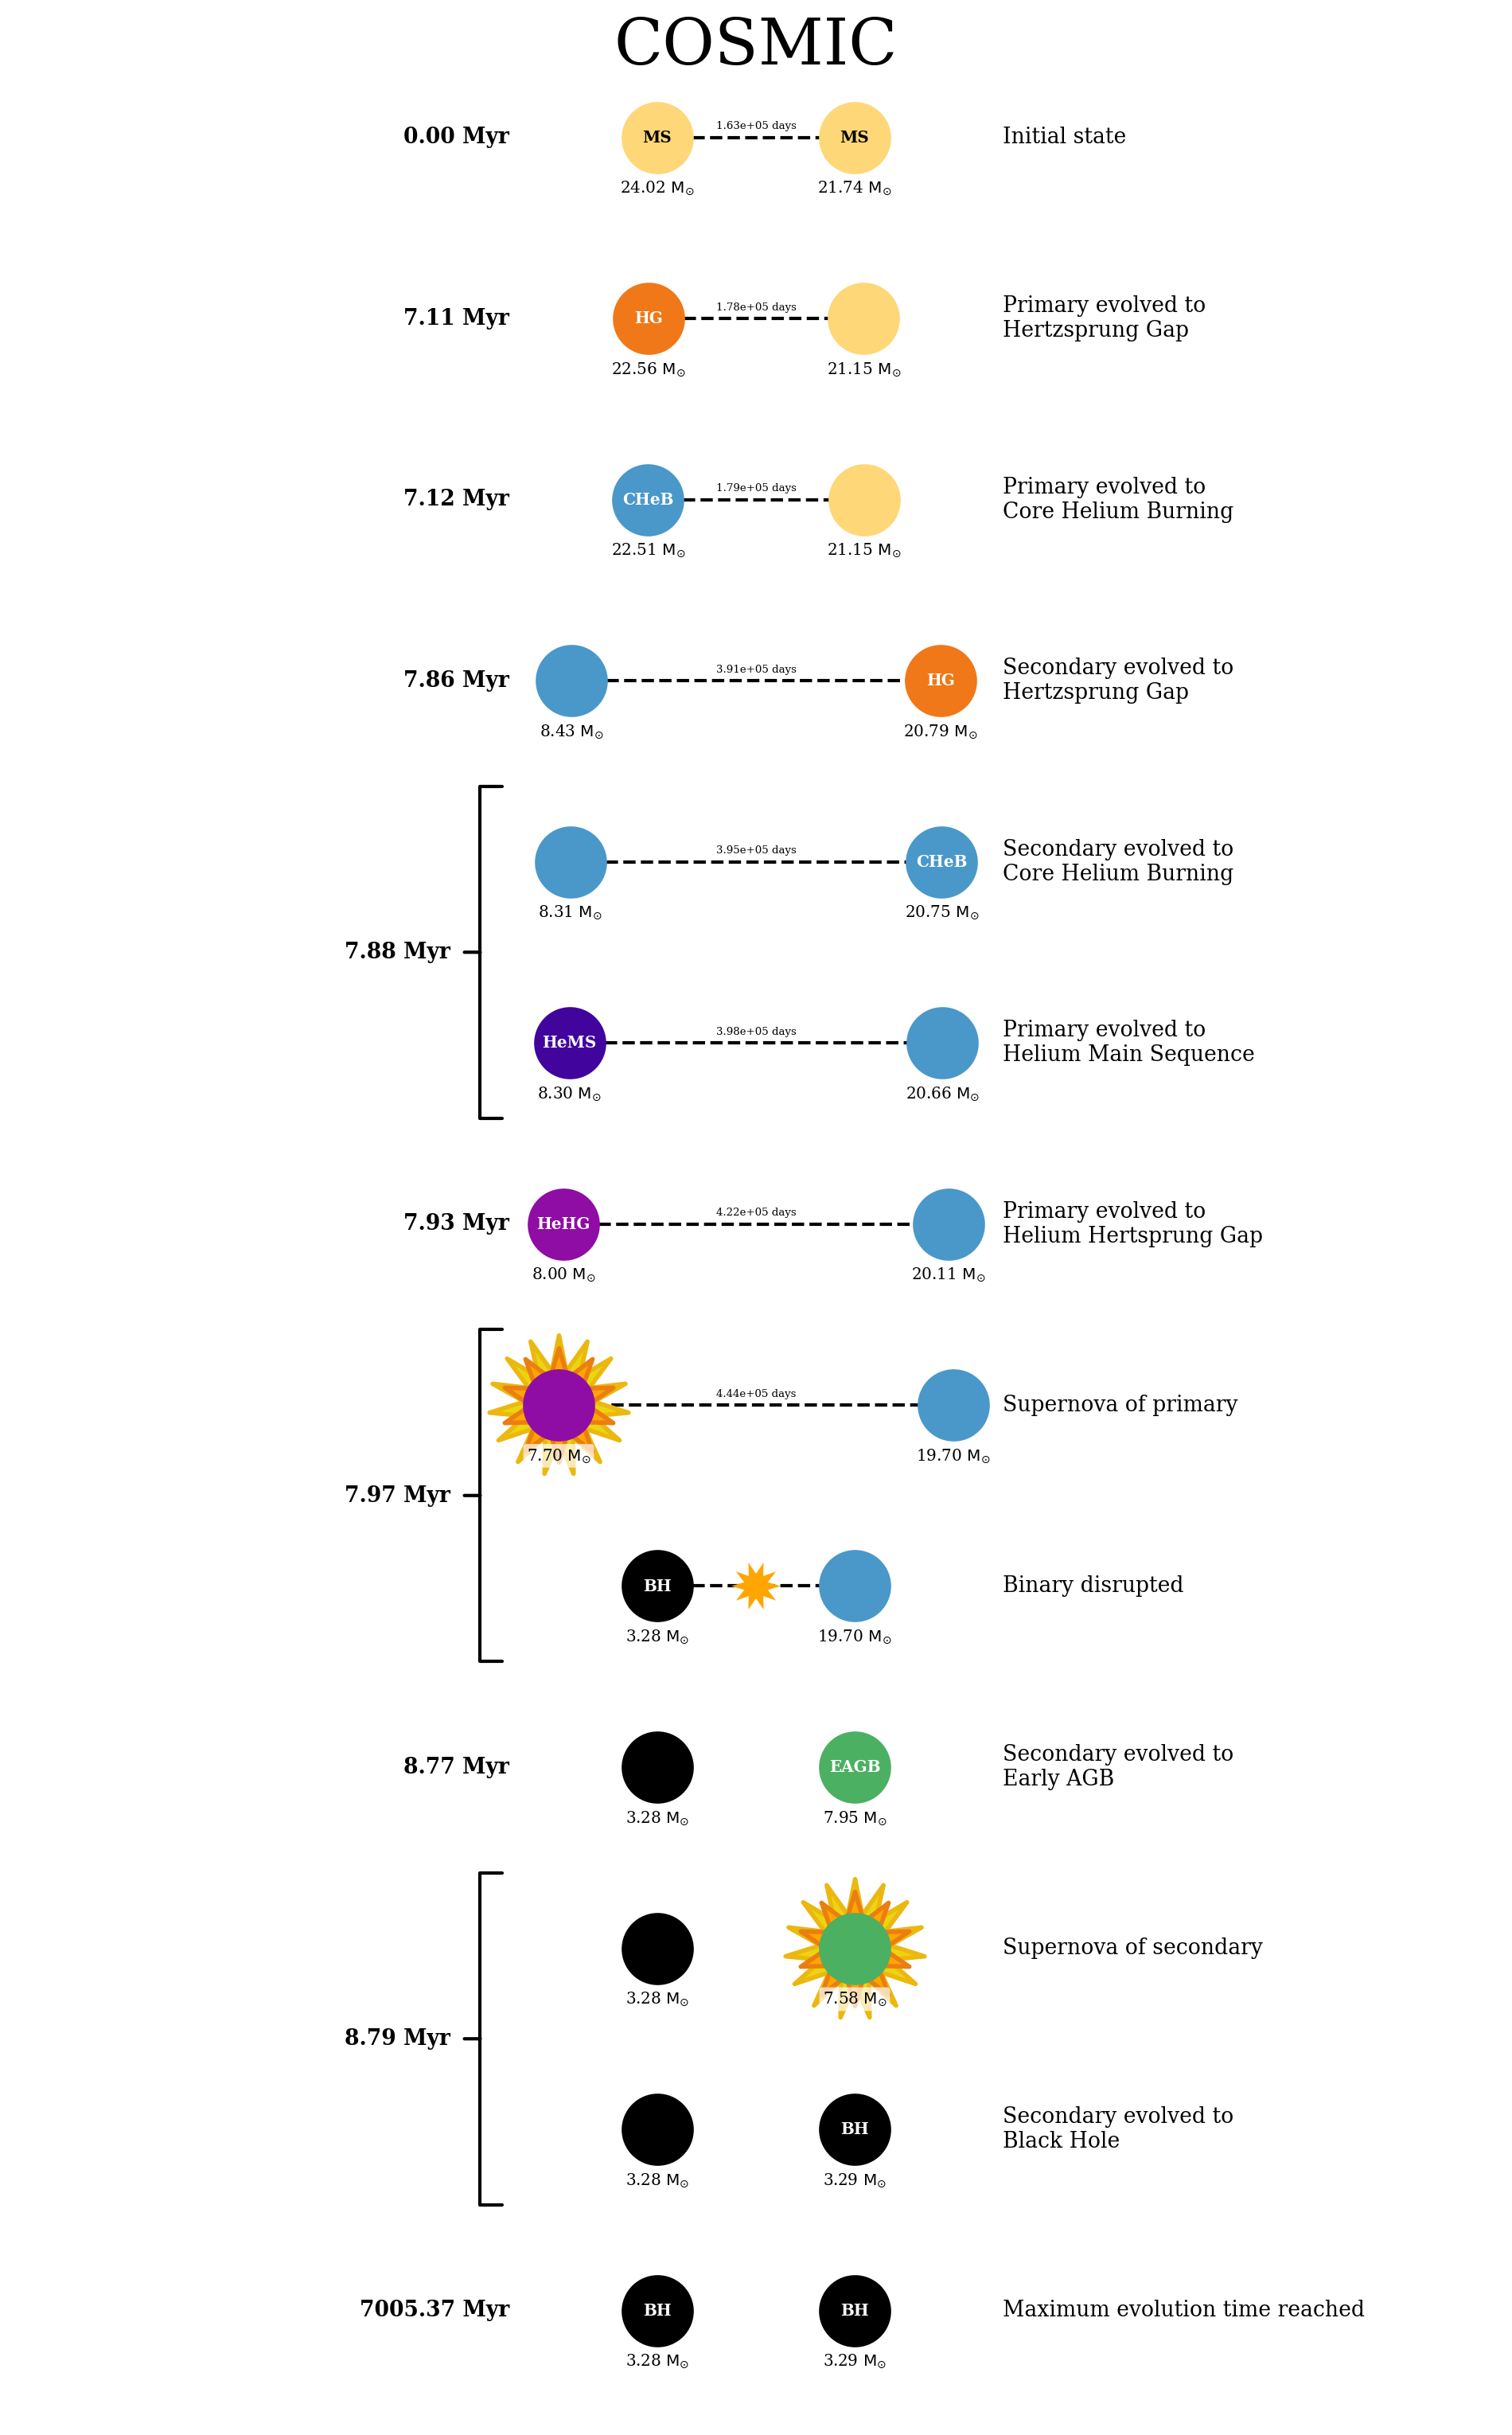

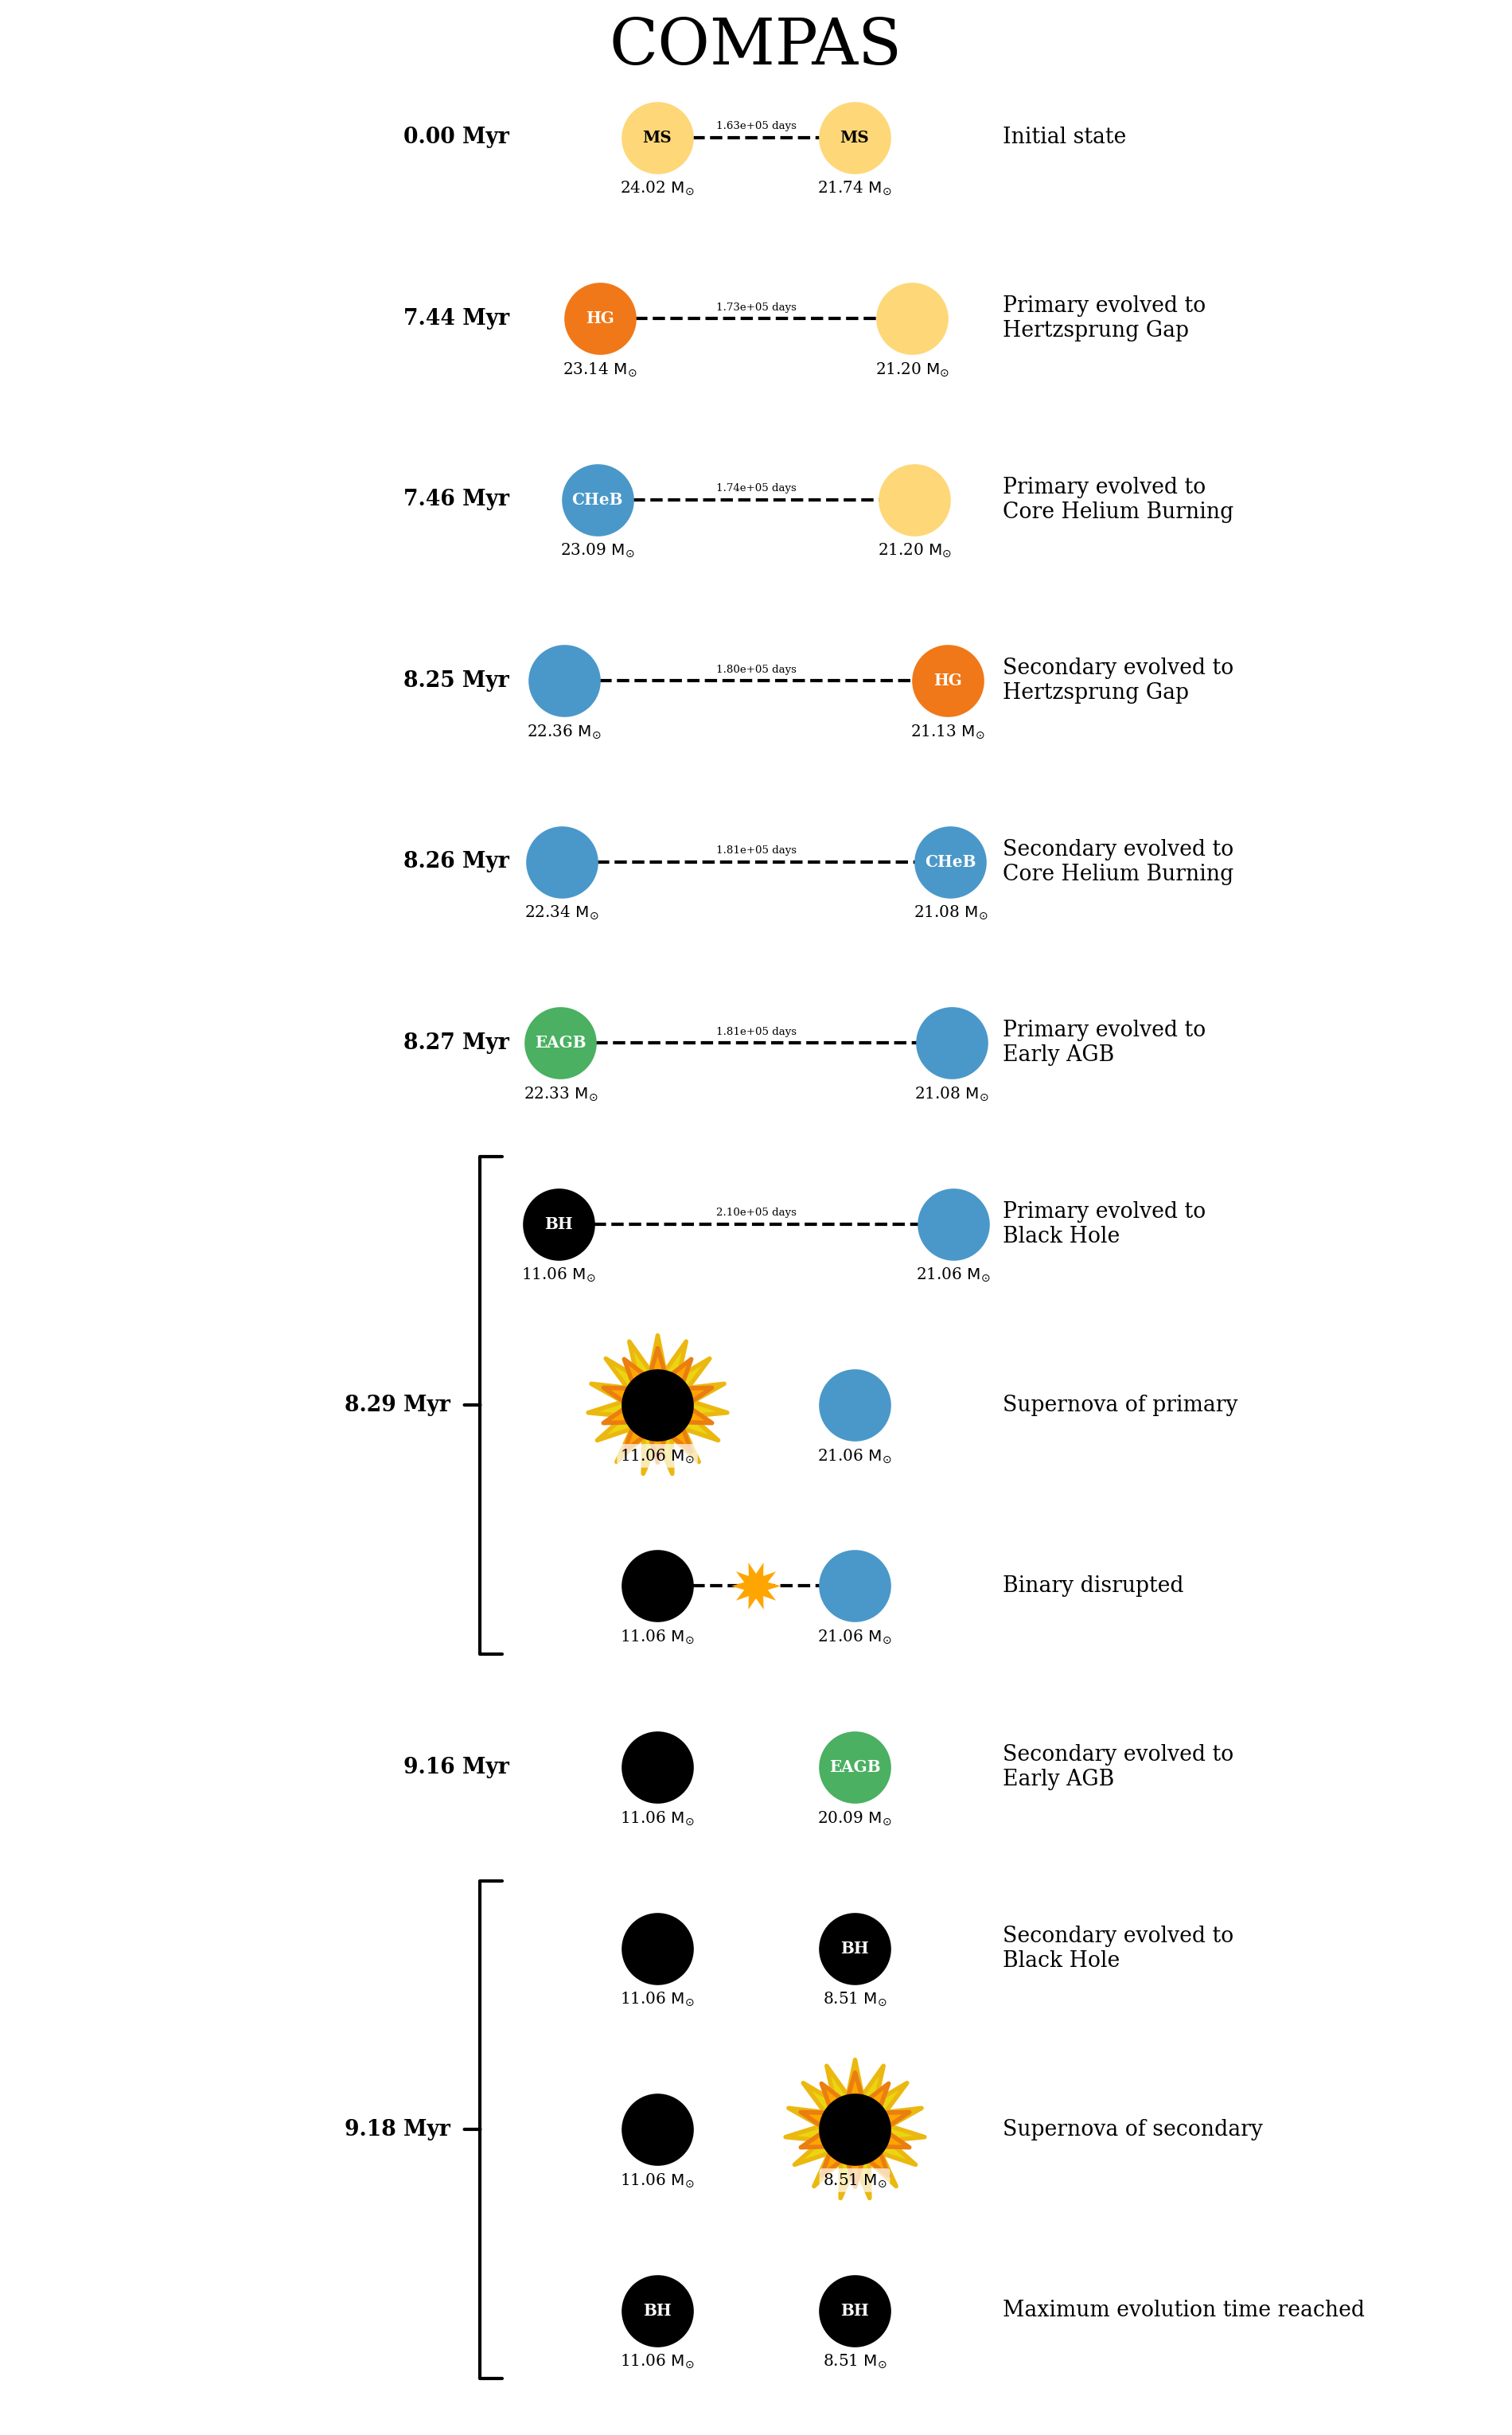

In [23]:
cosmic_p.plot_cartoon_binary(cosmic_p.bin_nums[0], plot_title="COSMIC");
p.plot_cartoon_binary(cosmic_p.bin_nums[0], plot_title="COMPAS");

As is probably evident (these are randomly generated each time I build the docs, so not for sure), ``COMPAS`` and ``COSMIC`` give different results for the same inputs!

You can also do the opposite and convert a ``COSMIC`` population back to a ``COMPAS`` one.

In [24]:
compas_from_cosmic = cosmic_p.to_COMPASPopulation()
compas_from_cosmic

<COMPASPopulation - 101 evolved systems - galactic_potential=MilkyWayPotential, sfh_model=Wagg2022>